# **Random Forest Classifier Model Theory**


## Theory
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (majority vote) of the individual trees.
The main idea is to:
- Create multiple decision trees using bootstrap samples of the data
- Each tree uses a random subset of features at each split
- Combine predictions through majority voting
- Reduce overfitting through randomization and averaging

## Key Components
- **Bootstrap Aggregating (Bagging)**:
$$ \text{Sample}_i = \text{Bootstrap}(D, n) $$
where D is the training dataset and n is sample size

- **Random Feature Selection**:
$$ m = \sqrt{p} \text{ or } m = \log_2(p) $$
where p is total number of features and m is features considered per split

## Training Process
1. **Bootstrap Sample Creation**:
- Create N bootstrap samples from training data
- Each sample is same size as original dataset
- Samples drawn with replacement

2. **Tree Construction**:
- For each bootstrap sample:
 - Grow unpruned decision tree
 - At each node, consider only random subset of features
 - Split on best feature among random subset
 - Continue until stopping criteria met

3. **Ensemble Formation**:
$$ \text{Prediction} = \text{mode}(h_1(x), h_2(x), ..., h_N(x)) $$
where $h_i(x)$ is prediction of i-th tree

## Key Hyperparameters
- **n_estimators**: Number of trees in forest
- **max_features**: Number of features to consider at each split
- **max_depth**: Maximum depth of trees
- **min_samples_split**: Minimum samples required to split node
- **min_samples_leaf**: Minimum samples required in leaf node

## Feature Importance
- **Gini Importance**:
$$ \text{Importance}(f) = \sum_{t \in \text{Trees}} \sum_{n \in \text{Nodes}} \text{Gini decrease}(n,f) $$

- **Permutation Importance**:
$$ \text{Importance}(f) = \text{Error}_{\text{permuted}} - \text{Error}_{\text{original}} $$

## Advantages
- Less prone to overfitting than single decision trees
- Handles high-dimensional data well
- Provides feature importance measures
- Robust to outliers and non-linear features
- Can handle missing values

## Disadvantages
- More computationally intensive than single decision tree
- Less interpretable than single decision tree
- May require more memory for large numbers of trees
- Prediction time increases with number of trees

## Implementation Tips
- Use cross-validation to determine optimal number of trees
- Consider out-of-bag error for model evaluation
- Balance between number of trees and computational resources
- For high-dimensional data, increase number of trees
- Use feature importance for feature selection

## Model Evaluation for Random Forest Classifier

### 1. Accuracy Score
Formula:
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
Description:
- Accuracy measures the overall correctness of predictions across all trees.
- Represents the ensemble's collective predictive performance.
Interpretation:
- Higher accuracy indicates better overall model performance.
- More reliable than single decision tree accuracy due to ensemble averaging.
---

### 2. Out-of-Bag (OOB) Score
Formula:
$$
\text{OOB Score} = \frac{1}{n}\sum_{i=1}^{n} I(\hat{y}_i^{OOB} = y_i)
$$
Description:
- OOB score is calculated using samples not used in building each tree.
- Natural cross-validation mechanism unique to Random Forests.
Interpretation:
- Provides unbiased estimate of model performance.
- No separate test set required for validation.
---

### 3. Feature Importance
Formula:
$$
\text{Importance}(x_i) = \frac{1}{T}\sum_{t=1}^{T} \sum_{j \in \text{splits on }x_i} n_j \cdot \Delta\text{impurity}_j
$$
Description:
- Aggregates feature importance across all trees in the forest.
- Based on decrease in impurity weighted by number of samples.
Interpretation:
- Higher values indicate more influential features.
- More robust than single decision tree importance scores.
---

### 4. Proximity Matrix
Description:
- Measures similarity between data points based on tree co-occurrence.
- Records how often pairs of observations land in the same terminal nodes.
Interpretation:
- Higher proximity values indicate more similar observations.
- Useful for outlier detection and data structure analysis.
---

### 5. Vote Distribution
Formula:
$$
\text{Vote Probability}_i = \frac{\text{Number of votes for class i}}{\text{Total number of trees}}
$$
Description:
- Distribution of votes across all trees for each prediction.
- Provides confidence measure for predictions.
Interpretation:
- More uniform distribution indicates uncertainty.
- Strong majority suggests higher confidence in prediction.
---

### 6. Gini Importance
Formula:
$$
\text{Gini Importance} = \sum_{t \in \text{trees}} \sum_{n \in \text{nodes}} p(n) \Delta i(n)
$$
Description:
- Measures node impurity decrease across all trees.
- Weighted by number of samples reaching the node.
Interpretation:
- Higher values indicate more discriminative features.
- Used for feature selection and ranking.
---

### 7. Bootstrap Aggregation Metrics
Description:
- Analyzes variance reduction through bootstrapping.
- Measures diversity among individual trees.
Interpretation:
- Higher diversity generally indicates better ensemble performance.
- Helps in understanding model stability.
---

### 8. Mean Decrease in Accuracy
Description:
- Measures accuracy drop when a feature is permuted.
- Calculated separately for each feature across all trees.
Interpretation:
- Larger decrease indicates more important features.
- More reliable than single-tree importance measures.
---

### 9. Cross-Validation Performance
Description:
- K-fold cross-validation results across multiple metrics.
- Includes variance measures of forest performance.
Interpretation:
- Low variance indicates stable model performance.
- More reliable than single decision tree cross-validation.
---

### 10. Confusion Matrix
Description:
- Aggregated prediction outcomes across all trees:
 - True Positives (TP)
 - True Negatives (TN)
 - False Positives (FP)
 - False Negatives (FN)
Interpretation:
- More stable than single decision tree confusion matrix.
- Used for analyzing class-specific performance.
---

## sklearn template [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_leaf_nodes=None, n_jobs=None, class_weight=None)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `n_estimators`             | The number of trees in the forest                                                                                                                   | `100`            |
| `criterion`                | Function to measure split quality ('gini', 'entropy', 'log_loss')                                                                                    | `gini`           |
| `max_depth`                | Maximum depth of the trees. If None, nodes expanded until pure leaves                                                                               | `None`           |
| `min_samples_split`        | Minimum samples required to split internal node                                                                                                     | `2`              |
| `min_samples_leaf`         | Minimum samples required at leaf node                                                                                                              | `1`              |
| `max_features`             | Number of features to consider for best split ('sqrt', 'log2', int, float)                                                                         | `sqrt`           |
| `bootstrap`                | Whether bootstrap samples are used when building trees                                                                                              | `True`           |
| `n_jobs`                   | Number of parallel jobs. None means 1, -1 means all processors                                                                                      | `None`           |
| `random_state`             | Controls randomness in bootstrapping and feature selection                                                                                          | `None`           |
| `class_weight`             | Weights for classes (dict, 'balanced', 'balanced_subsample')                                                                                        | `None`           |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `classes_`                 | The classes labels                                                                                                                                  |
| `feature_importances_`     | The impurity-based feature importances                                                                                                             |
| `n_classes_`               | The number of classes                                                                                                                               |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |
| `estimators_`              | The collection of fitted sub-estimators (trees)                                                                                                     |
| `oob_score_`              | Score on out-of-bag samples (only if oob_score=True)                                                                                                |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X, y)`                | Build a forest of trees from training set                                                                                                           |
| `predict(X)`               | Predict class for X                                                                                                                                 |
| `predict_proba(X)`         | Predict class probabilities for X                                                                                                                   |
| `score(X, y)`              | Return the mean accuracy on test data and labels                                                                                                    |
| `apply(X)`                 | Apply trees in the forest to X, return leaf indices                                                                                                 |
| `decision_path(X)`         | Return the decision path in the forest                                                                                                              |

# Random Forest Classifier - Example

## Data loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O


data = '/home/petar-ubuntu/Learning/ML_Theory/ML_Models/Supervised Learning/Classification models/Random Forest Classifier/data/car_evaluation.csv'

df = pd.read_csv(data, header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


##  Data processing

In [2]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [3]:
X = df.drop(['class'], axis=1)

y = df['class']

# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [4]:
# import category encoders

import category_encoders as ce

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

## Plotting data

## Model definition

In [7]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
rfc_100.fit(X_train, y_train)


# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

## Model evaulation

In [9]:
# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


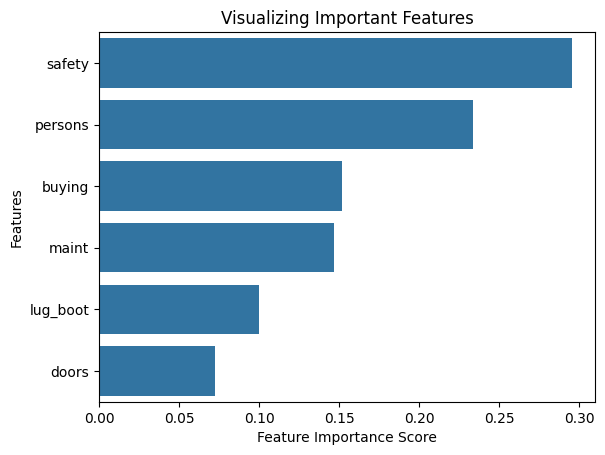

In [12]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.99      0.98      0.98       397
       vgood       0.87      0.80      0.83        25

    accuracy                           0.95       571
   macro avg       0.84      0.88      0.85       571
weighted avg       0.95      0.95      0.95       571



In [14]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[114   9   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   2   0  20]]
